<a id='top'></a>
## Project Title: Hybrid Vehicle Dataset Analysis

## Contents

1. <a href=#intro>Introduction</a>
    1. <a href=#projecttarget>Project Deliverables</a>
1. <a href=#datapre>Data Preprocessing</a>
    1. <a href=#dataoverview>Automobile Data Overview</a>
    1. <a href=#eda>Exploratory Data Analysis</a>
    1. <a href=#normalize1>Data Normalization</a>
1. <a href=#clu>Clustering</a>
    1. <a href=#kpro>K-prototypes Clustering</a>
1. <a href=#reg>Regression</a>
    1. <a href=#split>Data Split and Test</a>
    1. <a href=#nor>Data Normalization</a>
    1. <a href=#pca>Principle Component Analysis</a>
    1. <a href=#linear>Linear Regression Model</a>
    1. <a href=#ridege>Ridege Regression Model</a>
    1. <a href=#knn>KNN Regression Model</a>
    1. <a href=#decision>Decision Tree Regression Model</a>
    1. <a href=#rfr>Random Forest Regression Model</a>
    1. <a href=#neural>Neural Network Regression Model</a>
1. <a href=#cla>Classification</a>
    1. <a href=#split2>Data Split and Test</a>
    1. <a href=#nor2>Data Normalization</a>
    1. <a href=#k-n>k-Neighbours Classification</a>
    1. <a href=#sur>Support Vector Classification</a>
1. <a href=#con>Conclusion</a>

<a id='intro'></a>
## 1. Introduction
<a href=#top>(back to top)</a>

<a id='projecttarget'></a>
### Project Delivertbles
1, Clustering the vehicles into different types according to the the given parameters\
2, Predict the "current yearly mileage" with different regression models\
3, Predict the "is battery changed" with different classification models

<a id='datapre'></a>
## 2. Data Preprocessing
<a href=#top>(back to top)</a>

In [2]:
import numpy as np
import pandas as pd
from numpy import inf
from numpy import zeros

import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
from time import time

#from matplotlib.pyplot import MultipleLocator
#from numpy.linalg import eig

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn import set_config

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
# For Regression Algorithm Library Based On Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# For Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# For Splitting Data In Training And Testing
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV


<a id='dataoverview'></a>
### Automobile Data Overview

Read data from csv file.

In [3]:
# Reading data from csv file
auto_data = pd.read_csv('./Project_Dataset.csv')

In [4]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861916 entries, 0 to 861915
Data columns (total 76 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Sample_ID                         861916 non-null  int64  
 1   Charge_mode_DISTANCE              238078 non-null  float64
 2   SEND_TIME                         860235 non-null  object 
 3   Vehicle_ID                        861916 non-null  int64  
 4   Operation_TIME                    861815 non-null  float64
 5   Operation_DISTANCE                826697 non-null  float64
 6   Sender                            861916 non-null  int64  
 7   Gear_Level_Auto_Time              109882 non-null  float64
 8   Gear_Level_Man_Time               109906 non-null  float64
 9   Total_Distance                    798851 non-null  float64
 10  Brake_Time                        278583 non-null  float64
 11  Cruise_Time                       202469 non-null  f

In [5]:
#Data shape (rows, columns)
auto_data.shape

(861916, 76)

In [6]:
#The first 3 rows of dataset
auto_data.sample(5)

,Sample_ID,Charge_mode_DISTANCE,SEND_TIME,Vehicle_ID,Operation_TIME,Operation_DISTANCE,Sender,Gear_Level_Auto_Time,Gear_Level_Man_Time,Total_Distance,...,City,Cluster,Measure_ROw,Is_Bttery_Changed,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,IS_Battery_Supplier_Type2_FAULTY,IS_VIP_FLEET,Battery_Supplier
67105,118291519,NaN,2017-11-30 08:58:02,75,3212.515,53678.77,2,NaN,NaN,53678.77,...,NaN,NaN,2011,0,0,1,0,0,0,1.0
175320,143655003,NaN,2018-04-01 18:19:40,209,10472.042,236240.95,2,NaN,NaN,236240.95,...,17.0,4.0,929,0,0,1,1,0,0,1.0
208276,328405328,NaN,2019-07-11 08:43:20,246,11914.474,357146.26,1,9786.732,0.0,290605.20,...,46.0,3.0,1317,0,0,1,0,0,0,1.0
149591,139148860,NaN,2018-03-10 10:17:02,172,11450.434,305584.87,2,NaN,NaN,305584.87,...,7.0,4.0,988,0,0,0,0,0,0,1.0
263488,131639063,NaN,2018-02-02 04:18:40,315,10662.413,228254.97,2,NaN,NaN,228254.97,...,12.0,4.0,1017,0,0,0,1,0,0,1.0


First, we drop those columns that have fewer than 500,000 non-missing values

In [7]:
drop_these_columns = auto_data.apply(lambda x: np.sum(pd.notna(x)), axis=0) < 500000
drop_these_columns

Sample_ID                           False
Charge_mode_DISTANCE                 True
SEND_TIME                           False
Vehicle_ID                          False
Operation_TIME                      False
                                    ...  
IS_FLEET_TOF_MONITORED              False
IS_CHECKED_IN_VDA                   False
IS_Battery_Supplier_Type2_FAULTY    False
IS_VIP_FLEET                        False
Battery_Supplier                    False
Length: 76, dtype: bool

In [8]:
auto_data.drop(columns=auto_data.columns[drop_these_columns], inplace=True)

Data shape after removing the columns with less than 500,000 no-missing values.

In [9]:
auto_data.shape

(861916, 48)

Drop columns of 'Sample_ID','SEND_TIME','Vehicle_ID','Battery_Replacement_date' since they will not contribute to any clustering, prediction or classification results.

In [10]:
auto_data.drop(columns=['Sample_ID','SEND_TIME','Vehicle_ID','Battery_Replacement_date'], inplace=True)

In [11]:
auto_data.replace('', np.nan, inplace = True)

In [12]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861916 entries, 0 to 861915
Data columns (total 44 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Operation_TIME                    861815 non-null  float64
 1   Operation_DISTANCE                826697 non-null  float64
 2   Sender                            861916 non-null  int64  
 3   Total_Distance                    798851 non-null  float64
 4   Drive_Distance                    506445 non-null  float64
 5   Drive_Fuel                        503291 non-null  float64
 6   Drive_Time                        536956 non-null  float64
 7   Idle_Fuel                         503274 non-null  float64
 8   Idle_Time                         788100 non-null  float64
 9   Key_On_Time                       532004 non-null  float64
 10  measure41                         661906 non-null  float64
 11  measure42                         661922 non-null  f

In [13]:
# drop missing values rows
no_miss = auto_data[pd.notna(auto_data).all(axis=1)].copy()
no_miss.shape

(197159, 44)

Data imputation with most frequent values.

In [14]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
no_miss1 = imputer.fit_transform(auto_data)

In [15]:
no_miss1.shape

(861916, 44)

Data imputation with mean/mode values.

In [16]:
# numeric columns
auto_data.fillna(auto_data.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
auto_data.fillna(auto_data.select_dtypes(include='object').mode().iloc[0], inplace=True)
no_miss2 = auto_data.copy()

In [17]:
no_miss2.shape

(861916, 44)

In [18]:
no_miss1 = pd.DataFrame(no_miss1, columns = auto_data.columns)

In [19]:
no_miss2 = pd.DataFrame(no_miss2, columns = auto_data.columns)

In [20]:
no_miss1.sample(5)

,Operation_TIME,Operation_DISTANCE,Sender,Total_Distance,Drive_Distance,Drive_Fuel,Drive_Time,Idle_Fuel,Idle_Time,Key_On_Time,...,City,Cluster,Measure_ROw,Is_Bttery_Changed,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,IS_Battery_Supplier_Type2_FAULTY,IS_VIP_FLEET,Battery_Supplier
702343,16975.456,298626.043,2.0,298626.043,0.00,0.000000,0.000,0.000000,6119.152,0.000,...,3.0,2.0,4162.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
165107,6195.937,212313.340,1.0,119247.740,115112.67,178450.655713,4075.727,9739.779030,942.510,7006.224,...,12.0,4.0,1013.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
757629,545.347,7008.850,1.0,7059.030,6654.54,9762.313352,276.904,1004.594595,137.379,598.607,...,3.0,1.0,2249.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
228573,18863.937,339804.842,2.0,339804.842,0.00,0.000000,0.000,0.000000,6507.389,0.000,...,3.0,2.0,4107.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
186503,12174.644,213573.430,2.0,213573.430,212013.85,343535.187607,8420.000,30859.072444,3355.183,15603.081,...,1.0,1.0,925.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
no_miss1 = pd.DataFrame(no_miss1,dtype=np.float)

<a id='eda'></a>
### Exploratory Data Analysis

Histogram comparison of each attribute

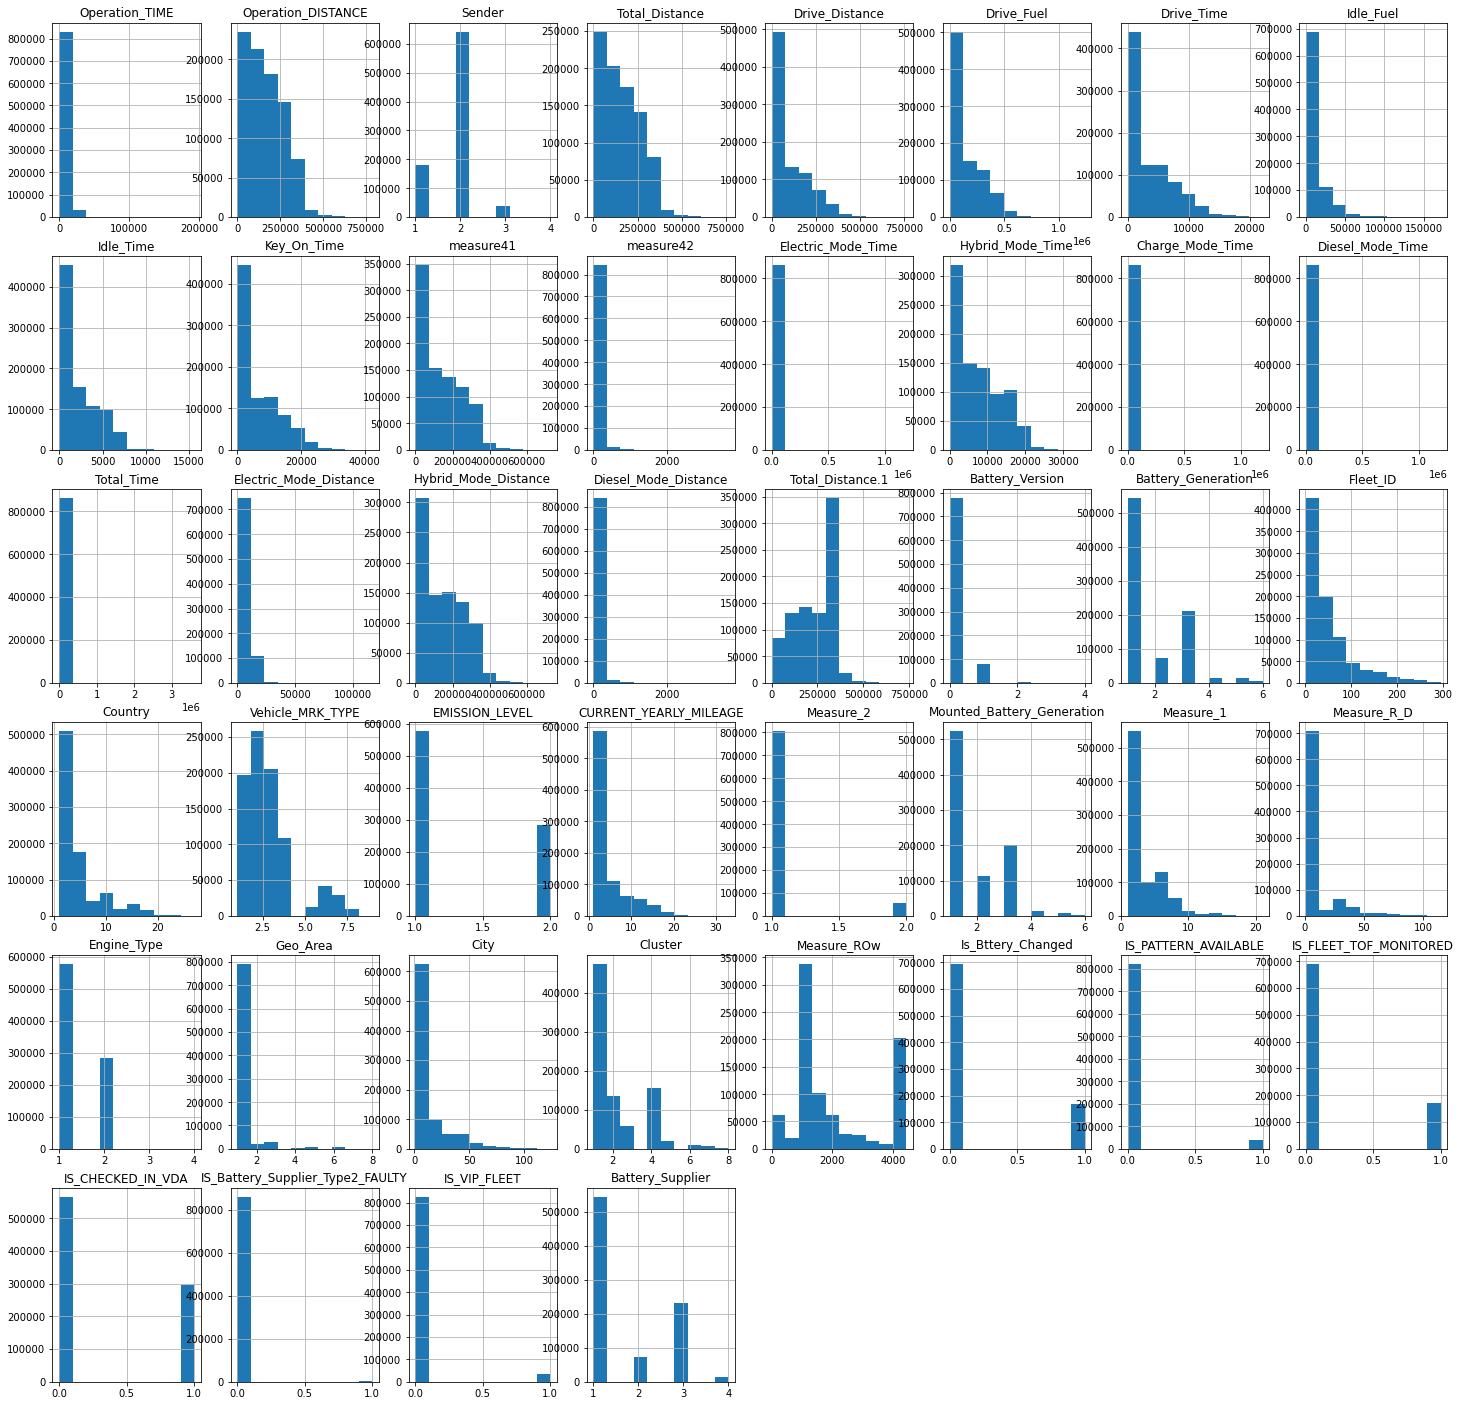

In [22]:
plt.figure(figsize=(25,25))
for x in range(44):
    plt.subplot(6,8,x+1)
    no_miss1.iloc[:,x].hist(alpha = 1)
    plt.title(no_miss1.columns[x])

DF1 represents the dataframe of those columns related with sample time.

In [23]:
df1 = no_miss2.iloc[:,:21]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861916 entries, 0 to 861915
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Operation_TIME          861916 non-null  float64
 1   Operation_DISTANCE      861916 non-null  float64
 2   Sender                  861916 non-null  int64  
 3   Total_Distance          861916 non-null  float64
 4   Drive_Distance          861916 non-null  float64
 5   Drive_Fuel              861916 non-null  float64
 6   Drive_Time              861916 non-null  float64
 7   Idle_Fuel               861916 non-null  float64
 8   Idle_Time               861916 non-null  float64
 9   Key_On_Time             861916 non-null  float64
 10  measure41               861916 non-null  float64
 11  measure42               861916 non-null  float64
 12  Electric_Mode_Time      861916 non-null  float64
 13  Hybrid_Mode_Time        861916 non-null  float64
 14  Charge_Mode_Time    

DF2 represents the dataframe of those columns related with vehicle parameters.

In [24]:
df2 = no_miss2.iloc[:,21:]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861916 entries, 0 to 861915
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Battery_Version                   861916 non-null  int64  
 1   Battery_Generation                861916 non-null  float64
 2   Fleet_ID                          861916 non-null  float64
 3   Country                           861916 non-null  float64
 4   Vehicle_MRK_TYPE                  861916 non-null  int64  
 5   EMISSION_LEVEL                    861916 non-null  int64  
 6   CURRENT_YEARLY_MILEAGE            861916 non-null  int64  
 7   Measure_2                         861916 non-null  float64
 8   Mounted_Battery_Generation        861916 non-null  float64
 9   Measure_1                         861916 non-null  float64
 10  Measure_R_D                       861916 non-null  float64
 11  Engine_Type                       861916 non-null  f

In [25]:
#data sampling
df2_sam = df2.sample(frac = 0.1)

In [26]:
#data sampling
df1_sam = df1.sample(frac = 0.1)

In [27]:
df2_sam.shape

(86192, 23)

Text(0.5, 1.0, 'Correlation Map Between Variables')

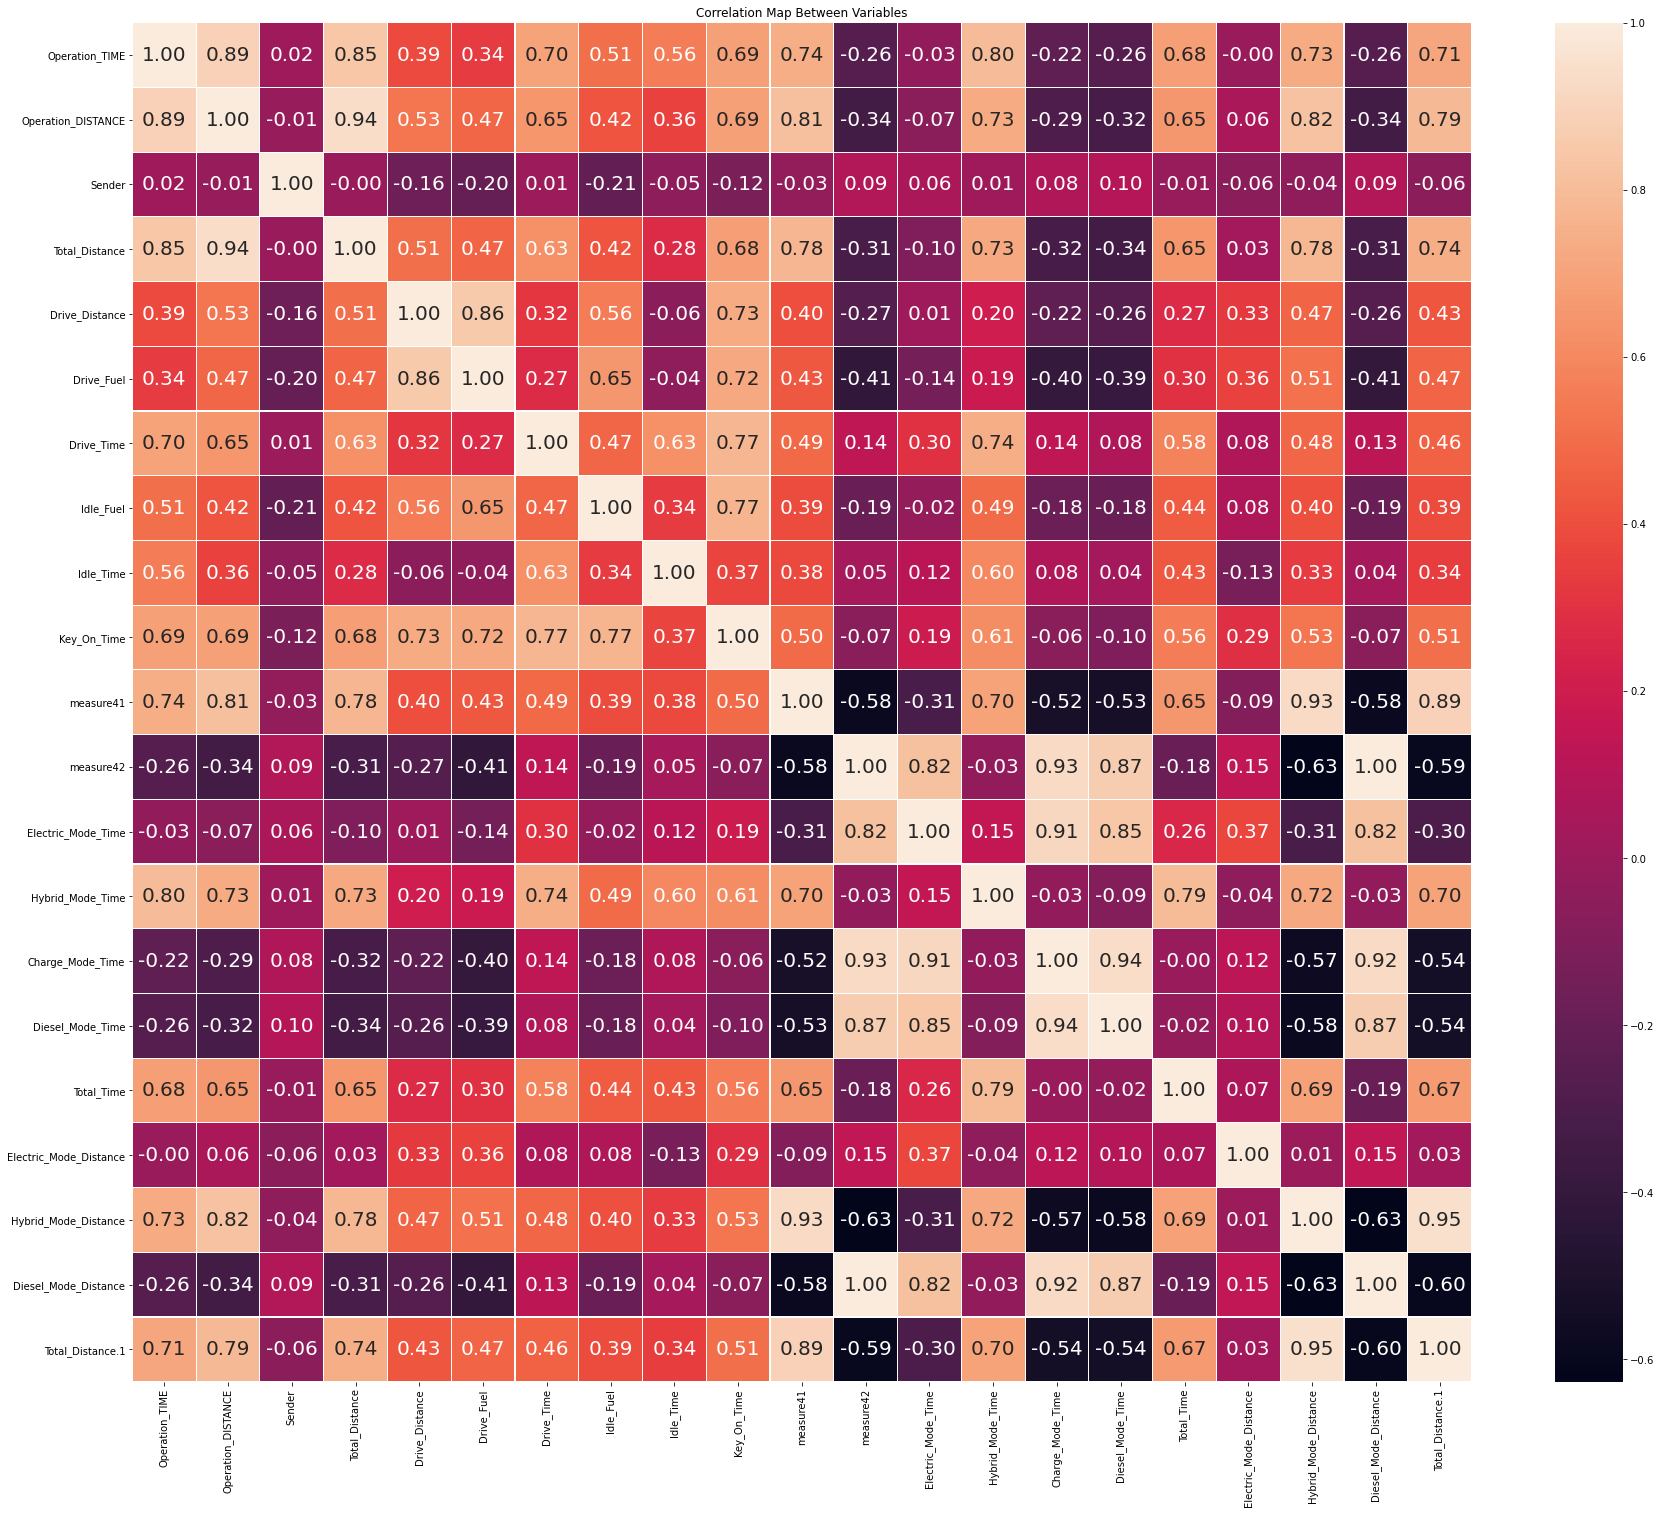

In [28]:
plt.figure(figsize=(30, 25))
sns.heatmap(df1.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = 0.1, linecolor= 'white', \
           annot_kws={'size':20})
plt.title('Correlation Map Between Variables')

Text(0.5, 1.0, 'Correlation Map Between Variables')

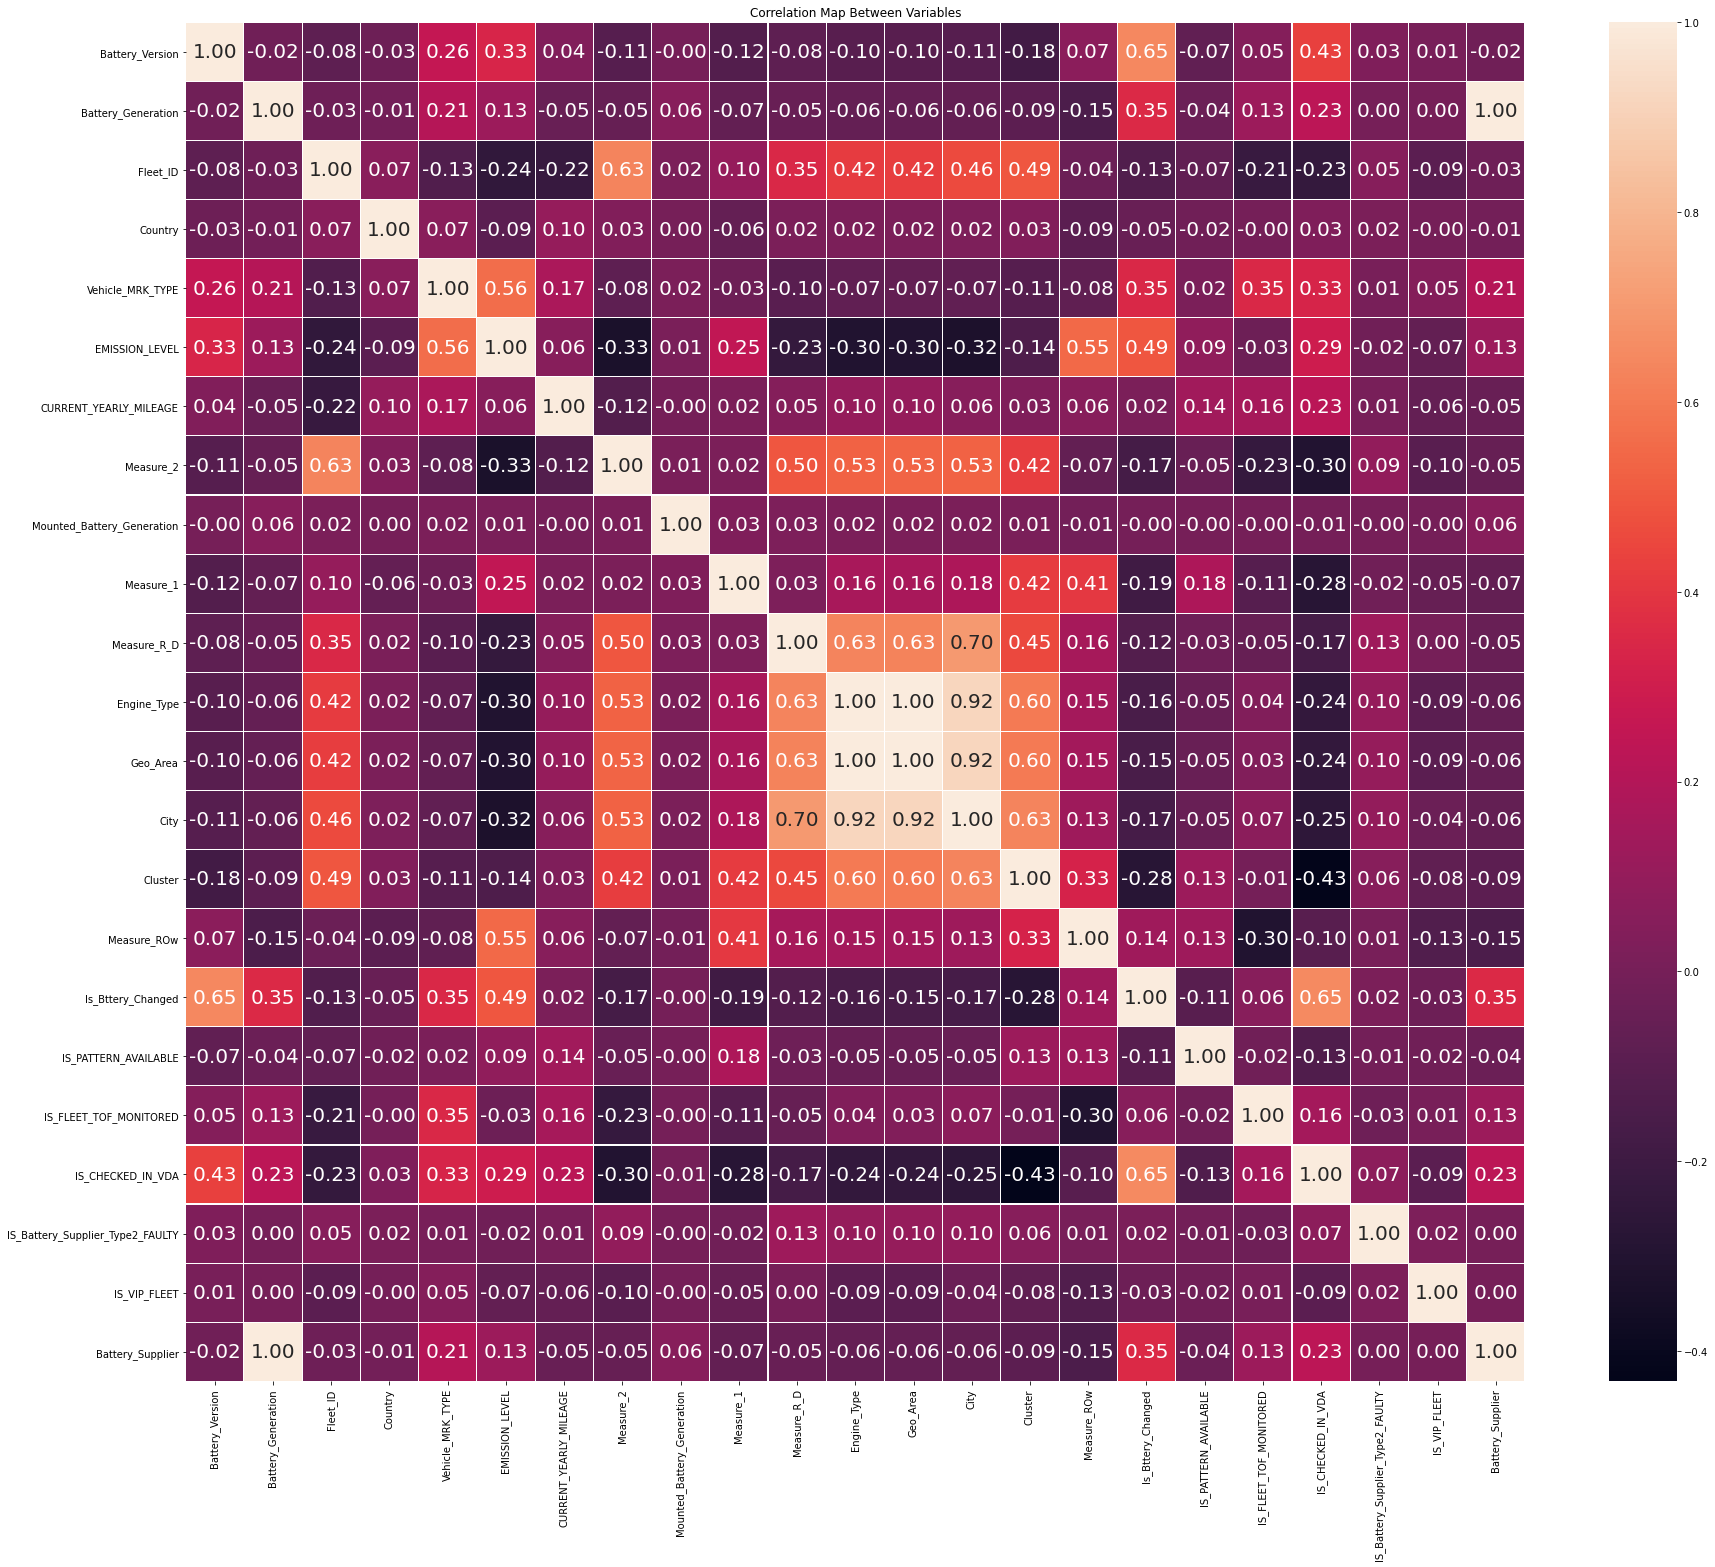

In [29]:
plt.figure(figsize=(30, 25))
sns.heatmap(df2.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = 0.1, linecolor= 'white', \
           annot_kws={'size':20})
plt.title('Correlation Map Between Variables')

<a id='normalize1'></a>
### Data Normalization

In [28]:
X = df2_sam.to_numpy()
X_scaled = ((X - X.mean())/X.std())

In [29]:
np.mean(X_scaled), np.std(X_scaled)

(-2.064514288614588e-18, 1.0000000000000004)

<a id='clu'></a>
## 3. Clustering
<a href=#top>(back to top)</a>

<a id='kpro'></a>
#### K-prototypes Clustering Algorithm

When it comes to clustering, k-means algorithm is the most famous algorithm used to make clustering. However, the standard k-means algorithm isn't directly applicable to categorical data. Because for discrete data, Euclidean distance isn't really meaningful.

We think out two approaches to handle mixed attribute data:

• Transform categorical values to a set of binary, numeric values and then apply regular numeric distance measures, the so called 1-hot-encoding.

• Use the Euclidean measure still for numeric data, but the simple matching measure for categorical data like Hamming distance.

For our dataset, some categorical attributes have many unique values like 'enginefuel_type'and 'vehicle_style'. If we use 1-hot-encoding, we will suffer from a large dimensionality. Thus, we think of the second method using a special algorithm named k-prototype which can deal with categrical and numerical data together.

In [83]:
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

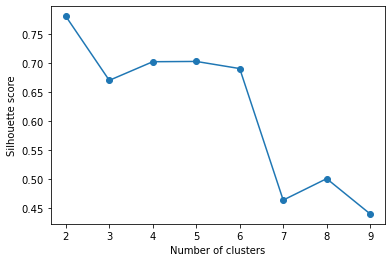

In [93]:
kp_scores = []
for k in range(2,10):
    kproto = KPrototypes(n_clusters=k, init='Cao')
    kproto.fit(X_scaled,categorical=[3])
    kp_scores.append(silhouette_score(X_scaled,kproto.labels_))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.plot(range(2,10),kp_scores,'o-')
plt.show()

In [94]:
kp_scores

[0.7807988470446824,
 0.6704458864425067,
 0.7025102054756374,
 0.7030212790057143,
 0.6907331437207104,
 0.46434079777452825,
 0.5012646236163276,
 0.4405588253051829]

In [80]:
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=1)

clusters = kproto.fit_predict(X_scaled, categorical=[3])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 874, ncost: 6605.63299915215
Run: 1, iteration: 2/100, moves: 200, ncost: 6546.9096906020795
Run: 1, iteration: 3/100, moves: 104, ncost: 6529.586076310172
Run: 1, iteration: 4/100, moves: 103, ncost: 6517.058380215048
Run: 1, iteration: 5/100, moves: 105, ncost: 6503.76491368019
Run: 1, iteration: 6/100, moves: 108, ncost: 6489.6061575003705
Run: 1, iteration: 7/100, moves: 69, ncost: 6484.68436555796
Run: 1, iteration: 8/100, moves: 35, ncost: 6482.934534205231
Run: 1, iteration: 9/100, moves: 20, ncost: 6482.54287178623
Run: 1, iteration: 10/100, moves: 0, ncost: 6482.54287178623
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 954, ncost: 8493.49790733069
Run: 2, iteration: 2/100, moves: 142, ncost: 8443.27781779653
Run: 2, iteration: 3/100, moves: 18, ncost: 8442.425370809906
Run: 2, iteration: 4/100, moves

In [132]:
kproto = KPrototypes(n_clusters=4, init='Cao')
kproto.fit(X_scaled,categorical=[3])

KPrototypes(gamma=0.5108799581918646, init='Cao', n_clusters=4)

In [133]:
df2_copy=df2_sam.copy()
df2_copy['type'] = kproto.labels_
df2_copy.head()

,Battery_Version,Battery_Generation,Fleet_ID,Country,Vehicle_MRK_TYPE,EMISSION_LEVEL,CURRENT_YEARLY_MILEAGE,Measure_2,Mounted_Battery_Generation,Measure_1,...,Cluster,Measure_ROw,Is_Bttery_Changed,IS_PATTERN_AVAILABLE,IS_FLEET_TOF_MONITORED,IS_CHECKED_IN_VDA,IS_Battery_Supplier_Type2_FAULTY,IS_VIP_FLEET,Battery_Supplier,type
397851,0.0,1.0,14.0,5.0,4.0,1.0,3.0,1.0,1.0,1.0,...,1.0,2116.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
294239,0.0,1.0,57.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,963.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
695716,0.0,3.0,21.0,2.0,3.0,2.0,5.0,1.0,3.0,1.0,...,1.0,4365.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3
744494,0.0,1.0,14.0,1.0,1.0,1.0,3.0,1.0,1.0,6.0,...,1.0,2238.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
824211,0.0,1.0,122.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,...,1.0,2869.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


Clustering boxplot based on Measure_Row.

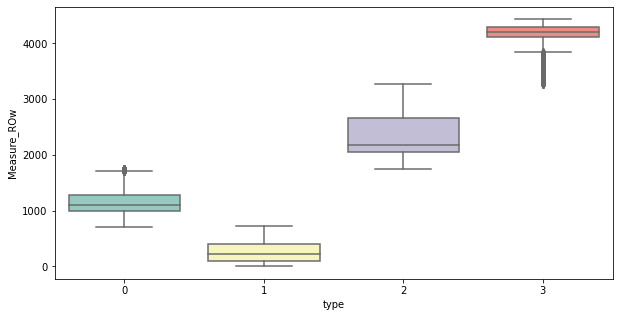

In [134]:
plt.figure(figsize=(10,5))
#plt.ylim(0,800)
sns.boxplot(x='type',y='Measure_ROw',data=df2_copy,palette="Set3")
plt.show()

Clustering boxplot based on Vehicle_MRK_TYPE.

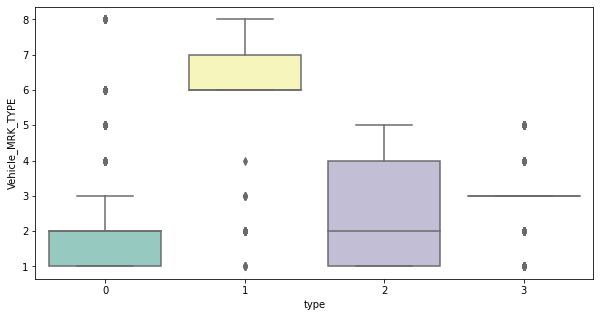

In [146]:
plt.figure(figsize=(10,5))
#plt.ylim(0,800)
sns.boxplot(x='type',y='Vehicle_MRK_TYPE',data=df2_copy,palette="Set3")
plt.show()

Clustering boxplot based on CURRENT_YEARLY_MILEAGE.

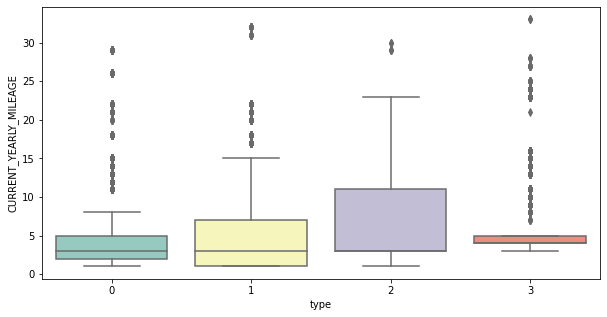

In [153]:
plt.figure(figsize=(10,5))
#plt.ylim(0,800)
sns.boxplot(x='type',y='CURRENT_YEARLY_MILEAGE',data=df2_copy,palette="Set3")
plt.show()

Clustering boxplot based on Mounted_Battery_Generation.

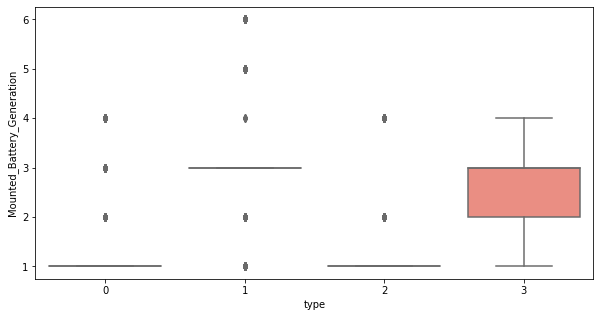

In [155]:
plt.figure(figsize=(10,5))
#plt.ylim(0,800)
sns.boxplot(x='type',y='Mounted_Battery_Generation',data=df2_copy,palette="Set3")
plt.show()

<a id='reg'></a>
## 4. Regression
<a href=#top>(back to top)</a>

<a id='split'></a>
### Split Data To Train and Test

Spliting data for training and testing, trained data size is 80% and test data size is 20%.

In [30]:
y = df1_sam['Total_Distance.1']
x = df1_sam.drop(['Total_Distance.1'],axis=1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 41)

<a id='nor'></a>
### Data Normalization

In [32]:
## Performing standardization before applying PCA
sc = StandardScaler()
x_ttrain = sc.fit_transform(x_train)
x_ttest = sc.transform(x_test)

In [33]:
np.mean(x_ttrain), np.std(x_ttrain)

(-1.095393859749375e-17, 1.0000000000000002)

<a id='pca'></a>
### Principle Component Analysis

In [34]:
pca = PCA()
x_ttrain = pca.fit_transform(x_ttrain)
x_ttest = pca.transform(x_ttest)

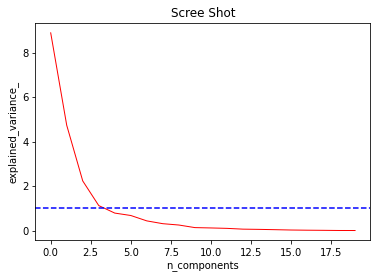

Explained variation (Eigenvalue) per principal component: [8.88409729e+00 4.73175002e+00 2.23044722e+00 1.12286647e+00
 7.86073475e-01 6.77697014e-01 4.35553224e-01 3.09636459e-01
 2.49622511e-01 1.33914776e-01 1.18277229e-01 9.97454464e-02
 6.43274798e-02 5.43139865e-02 4.07192052e-02 2.54029433e-02
 1.69321160e-02 1.16118046e-02 4.10903437e-03 3.19235915e-03]


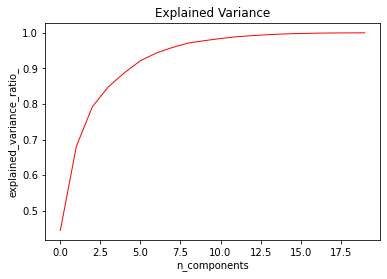

In [35]:
#plt.figure(figsize = (18,5))
#plt.plot(pca_mining.explained_variance_ratio_, 'k', linewidth=1, color = 'red')

plt.plot(pca.explained_variance_, 'k', linewidth = 1, color = 'red')
x_values = list(range(23))
#x_major_locator = MultipleLocator(2)
#ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.axhline(y = 1, color = 'blue', linestyle = '--')
plt.title('Scree Shot')
plt.show()


print('Explained variation (Eigenvalue) per principal component: {}'.format(pca.explained_variance_))


x_values = list(range(23))
#x_major_locator = MultipleLocator(2)
#ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
#plt.axhline(y = 0.9327, color = 'blue', linestyle = '--')
#plt.axvline(x = 12, color = 'blue', linestyle = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'k', linewidth = 1, color = 'red')
plt.title('Explained Variance')
plt.show()

In [36]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_.round(2)))
print()
print('The sum of the top "7" variance ratio is: {:.2%}'.format(sum(pca.explained_variance_ratio_[0:6]).round(2)))

Explained variation per principal component: [8.88 4.73 2.23 1.12 0.79 0.68 0.44 0.31 0.25 0.13 0.12 0.1  0.06 0.05
 0.04 0.03 0.02 0.01 0.   0.  ]

The sum of the top "7" variance ratio is: 92.00%


Performing PCA (n_components is 7)

In [237]:
pca = PCA(n_components = 7)
x_ttrain = pca.fit_transform(x_ttrain)
x_ttest = pca.transform(x_ttest)

In [238]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [239]:
loading_matrix = pd.DataFrame(loadings, columns=['com1','com2','com3','com4','com5','com6','com7'],index=x.columns)

In [241]:
loading_matrix.round(3)

,com1,com2,com3,com4,com5,com6,com7
Operation_TIME,0.849,0.293,-0.222,-0.040,-0.001,-0.039,0.148
Operation_DISTANCE,0.889,0.201,-0.078,-0.196,0.111,-0.211,0.158
Sender,-0.095,0.069,-0.290,-0.728,-0.565,0.228,-0.017
Total_Distance,0.870,0.180,-0.070,-0.214,0.078,-0.274,0.081
Drive_Distance,0.610,0.069,0.678,-0.078,-0.126,-0.193,0.108
Drive_Fuel,0.653,-0.073,0.690,0.016,-0.141,0.009,-0.011
Drive_Time,0.614,0.637,-0.118,0.082,-0.090,0.049,0.207
Idle_Fuel,0.630,0.216,0.337,0.412,-0.365,0.113,-0.261
Idle_Time,0.401,0.419,-0.451,0.405,-0.062,0.392,0.285
Key_On_Time,0.750,0.456,0.371,0.087,-0.175,0.018,0.065


Text(0.5, 1.0, 'Loading Matrix Heatmap')

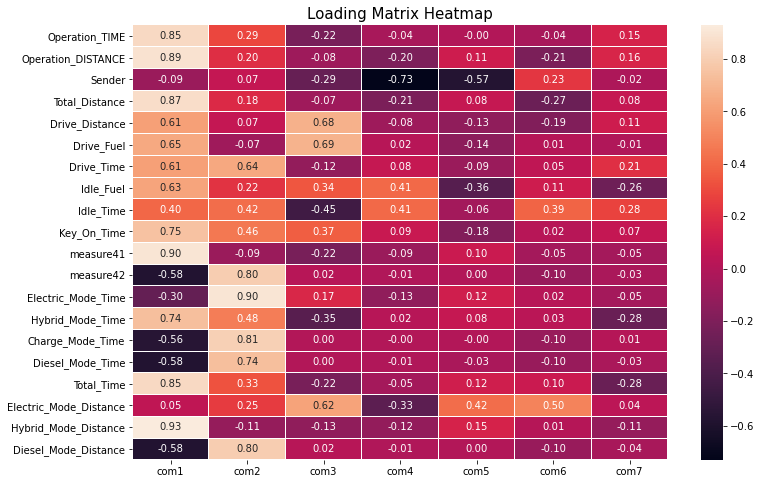

In [242]:
plt.figure(figsize=(12, 8))
sns.heatmap(loading_matrix.round(2),annot = True, fmt = '.2f', linewidths = 0.05, linecolor= 'white')
plt.title('Loading Matrix Heatmap', fontsize = 15)

### Imputation method:mean/mode

<a id='linear'></a>
### Linear Regression Model

The R2 value is: 0.87084


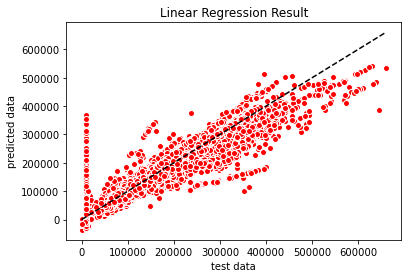

In [196]:
linear = LinearRegression() # Linear Regression
linear.fit(x_ttrain,y_train)
y_pre_linear = linear.predict(x_ttest)
linear_score = r2_score(y_test,y_pre_linear)
#linear_score = cross_val_score(linear, y_test,y_pre_linear,cv=5,scoring = "r2").mean()

plt.scatter(y_test, y_pre_linear, c = 'red', marker = 'o', edgecolors = 'white')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Linear Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

print(f'The R2 value is: {linear_score.round(5)}')

In [197]:
linear_EV = explained_variance_score(y_test, y_pre_linear)
linear_MAE = mean_absolute_error(y_test, y_pre_linear)
linear_MSE = mean_squared_error(y_test, y_pre_linear)
linear_RMSE = np.sqrt(mean_squared_error(y_test, y_pre_linear))

print('Linear Expained Value (EV)：',linear_EV.round(5))
print('Linear Mean Absolute Error (MAE)：',linear_MAE.round(5))
print('Linear Mean Squared Error (MSE)：',linear_MSE.round(5))
print('Linear Rooted Mean Squared Error (RMSE)：',linear_RMSE.round(5))

Linear Expained Value (EV)： 0.87088
Linear Mean Absolute Error (MAE)： 24416.86003
Linear Mean Squared Error (MSE)： 1940902500.50663
Linear Rooted Mean Squared Error (RMSE)： 44055.67501


<a id='ridege'></a>
### Ridege Regression Model

The R2 value is: 0.87084


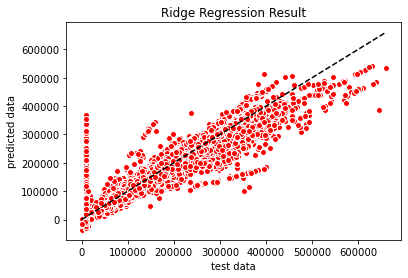

In [198]:
ridge = Ridge() # Ridge Regression
ridge.fit(x_ttrain,y_train)
y_pre_ridge = ridge.predict(x_ttest)
ridge_score =r2_score(y_test,y_pre_ridge)

plt.scatter(y_test, y_pre_ridge, c = 'red', marker = 'o', edgecolors = 'white')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Ridge Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

print(f'The R2 value is: {ridge_score.round(5)}')

In [199]:
ridge_EV = explained_variance_score(y_test, y_pre_ridge)
ridge_MAE = mean_absolute_error(y_test, y_pre_ridge)
ridge_MSE = mean_squared_error(y_test, y_pre_ridge)
ridge_RMSE = np.sqrt(ridge_MSE)

print('Ridge Expained Value (EV)：',ridge_EV.round(5))
print('Ridge Mean Absolute Error (MAE)：',ridge_MAE.round(5))
print('Ridge Mean Squared Error (MSE)：',ridge_MSE.round(5))
print('Ridge Rooted Mean Squared Error (RMSE)：',ridge_RMSE.round(5))

Ridge Expained Value (EV)： 0.87088
Ridge Mean Absolute Error (MAE)： 24416.7888
Ridge Mean Squared Error (MSE)： 1940901671.1427
Ridge Rooted Mean Squared Error (RMSE)： 44055.6656


<a id='knn'></a>
### KNN Regression Model

In [200]:
y = df1_sam['Total_Distance.1']
x = df1_sam.drop(['Total_Distance.1'],axis=1)

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 41)

In [202]:
## Performing standardization before applying PCA
sc = StandardScaler()
x_ttrain = sc.fit_transform(x_train)
x_ttest = sc.transform(x_test)

Default configuration:
K = 5

The cross validation R2 score is: 0.98087


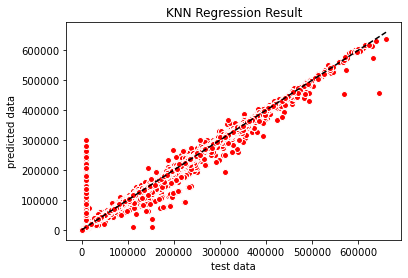

In [203]:
knn = KNeighborsRegressor(weights = 'uniform') # Knn Regression
knn.fit(x_ttrain,y_train)
y_pre_knn = knn.predict(x_ttest)
knn_score1 = r2_score(y_test,y_pre_knn)
#adj_r2 = (1 - (1 - knn_score) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
#knn_cross_val_score = cross_val_score(knn, x_train, y_train, cv=10 ,scoring = "r2")
#print(knn_cross_val_score)
#knn_score1 = cross_val_score(knn,x_ttrain,y_train,cv=5,scoring='r2').mean()

plt.scatter(y_test, y_pre_knn, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('KNN Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The R2 value is: {knn_score.round(5)}')
#print(f'The Adjusted R2 value is: {adj_r2.round(5)}')
print(f'The cross validation R2 score is: {knn_score1.round(5)}')

In [204]:
knn_EV = explained_variance_score(y_test, y_pre_knn)
knn_MAE = mean_absolute_error(y_test, y_pre_knn)
knn_MSE = mean_squared_error(y_test, y_pre_knn)
knn_RMSE = np.sqrt(knn_MSE)

print('KNN Expained Value (EV)：',knn_EV.round(5))
print('KNN Mean Absolute Error (MAE)：',knn_MAE.round(5))
print('KNN Mean Squared Error (MSE)：',knn_MSE.round(5))
print('KNN Rooted Mean Squared Error (RMSE)：',knn_RMSE.round(5))

KNN Expained Value (EV)： 0.98092
KNN Mean Absolute Error (MAE)： 3702.14974
KNN Mean Squared Error (MSE)： 287421293.61155
KNN Rooted Mean Squared Error (RMSE)： 16953.50387


<a id='decision'></a>
### Decision Tree Regression Model

The cross validation R2 score is: 0.99799


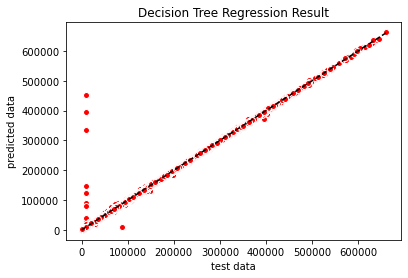

In [213]:
decision = DecisionTreeRegressor() # Decision Tree Regression
decision.fit(x_ttrain,y_train)
y_pre_decision = decision.predict(x_ttest)
DT_score =r2_score(y_test,y_pre_decision)
#adj_r2 = (1 - (1 - decision_score) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
#DT_score = cross_val_score(decision, x_ttrain, y_train, cv=5 ,scoring = "r2").mean()
#neg_mean_squared_error
plt.scatter(y_test, y_pre_decision, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Decision Tree Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The R2 value is: {decision_score.round(5)}')
#print(f'The Adjusted R2 value is: {decision_score.round(5)}')
print(f'The cross validation R2 score is: {DT_score.round(5)}')

In [215]:
DT_EV = explained_variance_score(y_test, y_pre_decision)
DT_MAE = mean_absolute_error(y_test, y_pre_decision)
DT_MSE = mean_squared_error(y_test, y_pre_decision)
DT_RMSE = np.sqrt(DT_MSE)

print('DT Expained Value (EV)：',DT_EV.round(5))
print('DT Mean Absolute Error (MAE)：',DT_MAE.round(5))
print('DT Mean Squared Error (MSE)：',DT_MSE.round(5))
print('DT Rooted Mean Squared Error (RMSE)：',DT_RMSE.round(5))

DT Expained Value (EV)： 0.99799
DT Mean Absolute Error (MAE)： 412.08651
DT Mean Squared Error (MSE)： 30190551.43184
DT Rooted Mean Squared Error (RMSE)： 5494.59293


<a id='rfr'></a>
### Random Forest Regression Model

#### Random Forest Regression

Default configuration:

n_estimators = 100\
max_depth = None\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 'auto'

OOB represents for the out of bag score.

In [205]:
#Calculate oob score
start = time()

rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_ttrain,y_train)
rfr_y_predict = rfr.predict(x_ttest)
oob_score1 = rfr.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score1.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.998
Running time: 1 min


The train R2 score is: 0.99762
The test R2 score is: 0.99837
The predict R2 score is: 0.99837
Running time: 2 min


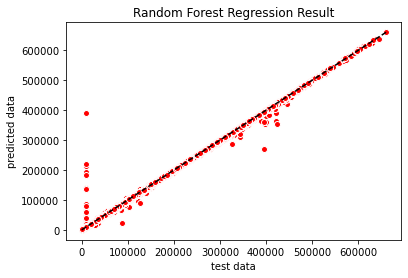

In [206]:
start = time()
'''
rfr = RandomForestRegressor(random_state = 5022) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)'''
#rfr_score = rfr.oob_score_
#rfr_r2_score_train1 = rfr.score(x_train, y_train)
rfr_r2_score_train1 = cross_val_score(rfr,x_ttrain,y_train,cv=3,scoring='r2').mean()
rfr_r2_score_test1 = rfr.score(x_ttest,y_test)
rfr_r2_score1 = r2_score(y_test,rfr_y_predict)

plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
print(f'The train R2 score is: {rfr_r2_score_train1.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test1.round(5)}')
print(f'The predict R2 score is: {rfr_r2_score1.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [207]:
rfr_EV1 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE1 = mean_absolute_error(y_test, rfr_y_predict)
rfr_MSE1 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE1 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV1.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE1.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE1.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE1.round(5))

RF Expained Value (EV)： 0.99837
RF Mean Absolute Error (MAE)： 380.39829
RF Mean Squared Error (MSE)： 24432579.20092
RF Rooted Mean Squared Error (RMSE)： 4942.93225


<a id='neural'></a>
### Neural Network Regression Model

MLP R2 Score:  0.97603


C:\Users\Chao\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[]

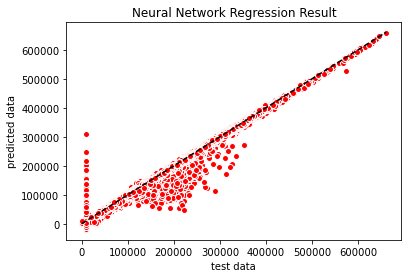

In [208]:
#clf = MLPRegressor(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2, 1), random_state=5022)
#clf = MLPRegressor(hidden_layer_sizes=(200, 200), tol=1e-2, max_iter=1000, learning_rate_init=0.001,random_state=5022)

clf = MLPRegressor(
    hidden_layer_sizes=(20,20,20),  max_iter=200, activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5,  shuffle=True,
    random_state=5022, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Data Training
clf.fit(x_ttrain,y_train.ravel())
y_pre_clf = clf.predict(x_ttest)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

#plt.plot(y_test,label = 'true')
#plt.plot(y_pre_clf,label ='Netural Network')
#plt.legend()
#plt.show()

plt.scatter(y_test, y_pre_clf, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Neural Network Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

In [209]:
clf_EV1 = explained_variance_score(y_test, rfr_y_predict)
clf_MAE1 = mean_absolute_error(y_test, rfr_y_predict)
clf_MSE1 = mean_squared_error(y_test, rfr_y_predict)
clf_RMSE1 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',clf_EV1.round(5))
print('RF Mean Absolute Error (MAE)：',clf_MAE1.round(5))
print('RF Mean Squared Error (MSE)：',clf_MSE1.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',clf_RMSE1.round(5))

RF Expained Value (EV)： 0.99837
RF Mean Absolute Error (MAE)： 380.39829
RF Mean Squared Error (MSE)： 24432579.20092
RF Rooted Mean Squared Error (RMSE)： 4942.93225


## Imputation method: most frequent

<a id='cla'></a>
## 4. Classification
<a href=#top>(back to top)</a>

In [263]:
from sklearn import neighbors, metrics, preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, validation_curve
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc, f1_score,precision_recall_curve
from sklearn.ensemble import  RandomForestClassifier

<a id='split2'></a>
### Split Data To Train and Test

Spliting data for training and testing, trained data size is 80% and test data size is 20%.

In [41]:
#df2 = df2.drop(['Geo_Area','City','Cluster','IS_PATTERN_AVAILABLE','IS_FLEET_TOF_MONITORED','IS_CHECKED_IN_VDA',\
#                'IS_Battery_Supplier_Type2_FAULTY','IS_VIP_FLEET'],axis = 1)

In [254]:
no_miss2_sam=no_miss2.sample(frac=0.1)

In [255]:
y = no_miss2_sam['Is_Bttery_Changed']
x = no_miss2_sam.drop(['Is_Bttery_Changed','IS_PATTERN_AVAILABLE','IS_FLEET_TOF_MONITORED','IS_CHECKED_IN_VDA',\
                       'IS_Battery_Supplier_Type2_FAULTY','IS_VIP_FLEET'],axis=1)

In [256]:
target = y
train = x

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [110]:
no_miss2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861916 entries, 0 to 861915
Data columns (total 44 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Operation_TIME                    861916 non-null  float64
 1   Operation_DISTANCE                861916 non-null  float64
 2   Sender                            861916 non-null  int64  
 3   Total_Distance                    861916 non-null  float64
 4   Drive_Distance                    861916 non-null  float64
 5   Drive_Fuel                        861916 non-null  float64
 6   Drive_Time                        861916 non-null  float64
 7   Idle_Fuel                         861916 non-null  float64
 8   Idle_Time                         861916 non-null  float64
 9   Key_On_Time                       861916 non-null  float64
 10  measure41                         861916 non-null  float64
 11  measure42                         861916 non-null  f

<a id='nor2'></a>
### Data Normalization

In [257]:
## Performing standardization before applying PCA
sc = StandardScaler()
x_ttrain = sc.fit_transform(x_train)
x_ttest = sc.transform(x_test)

In [143]:
np.mean(x_ttrain), np.std(x_ttrain)

(-4.663441762831869e-17, 0.9999999999999998)

<a id='k-n'></a>
### k-Nearest Neighbours Classification

In [237]:
nn10 = neighbors.KNeighborsClassifier(n_neighbors=30)

In [238]:
nn10.fit(x_ttrain, y_train)

KNeighborsClassifier(n_neighbors=30)

In [239]:
y_test_pred = nn10.predict(x_ttest)

In [240]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     13906
           1       0.94      0.80      0.86      3333

    accuracy                           0.95     17239
   macro avg       0.95      0.89      0.92     17239
weighted avg       0.95      0.95      0.95     17239



ROC Curves and Precision-Recall Curves

In [241]:
nn20 = neighbors.KNeighborsClassifier(n_neighbors=30)
nn20.fit(x_ttrain, y_train)

KNeighborsClassifier(n_neighbors=30)

In [242]:
y_test_probs = nn20.predict_proba(x_ttest)

In [243]:
y_test_pred = nn20.predict(x_ttest)

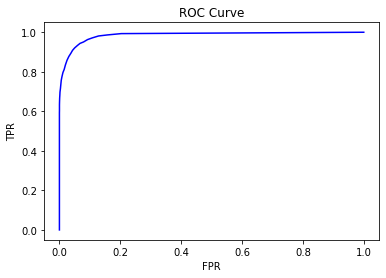

In [244]:
fpr, tpr, threshold = roc_curve(y_test, y_test_probs[:, 1])

plt.plot(fpr, tpr,'b-');
plt.title('ROC Curve')
plt.xlabel('FPR');plt.ylabel('TPR');

In [245]:
print(f'The area under the AUC is {auc(fpr, tpr):.3f}.')

The area under the AUC is 0.985.


In [246]:
nn_precision, nn_recall, thresholds = precision_recall_curve(y_test, y_test_probs[:, 1])

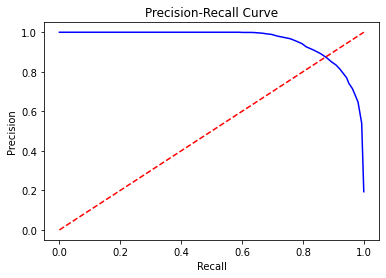

In [247]:
plt.plot(nn_recall, nn_precision,'b-');
plt.title('Precision-Recall Curve')
plt.xlabel('Recall');plt.ylabel('Precision');
plt.plot([0.0, 1.0], [0.0, 1.0], color='red', linestyle="--");

<a id='sur'></a>
### Support Vector Classification

In [283]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf')
clf.fit(x_ttrain,y_train)
y_pre=clf.predict(x_ttest)

In [284]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     13878
           1       0.95      0.78      0.86      3361

    accuracy                           0.95     17239
   macro avg       0.95      0.88      0.91     17239
weighted avg       0.95      0.95      0.95     17239



ROC Curves and Precision-Recall Curves

In [287]:
clf=SVC(kernel='rbf',probability=True)
clf.fit(x_ttrain,y_train)

SVC(probability=True)

In [288]:
y_test_probs = clf.predict_proba(x_ttest)

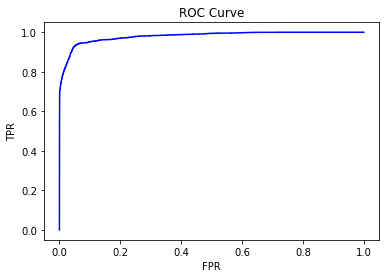

In [289]:
fpr, tpr, threshold = roc_curve(y_test, y_test_probs[:, 1])

plt.plot(fpr, tpr,'b-');
plt.title('ROC Curve')
plt.xlabel('FPR');plt.ylabel('TPR');

In [290]:
print(f'The area under the AUC is {auc(fpr, tpr):.3f}.')

The area under the AUC is 0.980.


In [291]:
nn_precision, nn_recall, thresholds = precision_recall_curve(y_test, y_test_probs[:, 1])

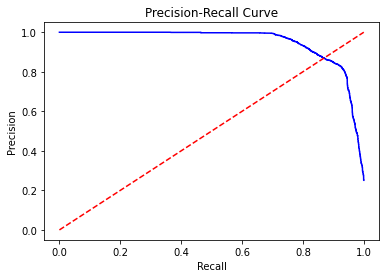

In [292]:
plt.plot(nn_recall, nn_precision,'b-');
plt.title('Precision-Recall Curve')
plt.xlabel('Recall');plt.ylabel('Precision');
plt.plot([0.0, 1.0], [0.0, 1.0], color='red', linestyle="--");

<a id='con'></a>
## 6. Conclusion
<a href=#top>(back to top)</a>

### Evaluation of Different Regression Models

In [217]:
model_eva = pd.DataFrame({'Value':['R2', 'EV', 'MAE', 'MSE', 'RMSE'],
                         'Linear Regression':[linear_score,linear_EV,linear_MAE,linear_MSE,linear_RMSE],
                          'Ridge Regression':[ridge_score,ridge_EV,ridge_MAE,ridge_MSE,ridge_RMSE],
                          'KNN Regression':[knn_score1,knn_EV,knn_MAE,knn_MSE,knn_RMSE],
                          'Decision Tree Regression':[DT_score,DT_EV,DT_MAE,DT_MSE,DT_RMSE],
                          'Random Forest Regression':[rfr_r2_score1,rfr_EV1,rfr_MAE1,rfr_MSE1,rfr_RMSE1],
                          'Neural Network Regression':[clf_score1,clf_EV1,clf_MAE1,clf_MSE1,clf_RMSE1],
                          })
model_eva.set_index(['Value'], inplace = True)

In [218]:
model_eva = pd.DataFrame(model_eva.values.T, index=model_eva.columns, columns=model_eva.index)

In [219]:
model_eva.round(3)

Value,R2,EV,MAE,MSE,RMSE
Linear Regression,0.871,0.871,24416.860,1.940903e+09,44055.675
Ridge Regression,0.871,0.871,24416.789,1.940902e+09,44055.666
KNN Regression,0.981,0.981,3702.150,2.874213e+08,16953.504
Decision Tree Regression,0.998,0.998,412.087,3.019055e+07,5494.593
Random Forest Regression,0.998,0.998,380.398,2.443258e+07,4942.932
Neural Network Regression,0.976,0.998,380.398,2.443258e+07,4942.932
